Ai -> Can we make machine that can mimic human ?

ML -> Prediction on the basis of Stats (Past Records).

DL -> Deep Learning is a Subset of ML, which works on the base of Artificial Neural Network.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np

data_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv"
df = pd.read_csv(data_path,skipinitialspace=True)
df.head()
# skipinitialspace used to remove blank space from the col names

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [111]:
ls = ['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status']

ls = [i.strip() for i in ls]

print(ls)

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [112]:
df.columns = ls

In [113]:
df['education'].value_counts().keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [114]:
ls = df['education']

ls = [i.strip() for i in ls]

df['education'] = ls

In [115]:
df['education'].value_counts().keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [116]:
ls = df['self_employed']

ls = [i.strip() for i in ls]

df['self_employed'] = ls

In [117]:
df['self_employed'].value_counts().keys()

Index(['Yes', 'No'], dtype='object', name='self_employed')

In [118]:
df['loan_status'].value_counts().keys()

Index(['Approved', 'Rejected'], dtype='object', name='loan_status')

In [119]:
ls = df['loan_status']

ls = [i.strip() for i in ls]

df['loan_status'] = ls

In [120]:
df['loan_status'].value_counts().keys()

Index(['Approved', 'Rejected'], dtype='object', name='loan_status')

In [121]:
df['cibil_score'].mean()

599.9360505973295

In [122]:
bussiness_man = df[df['self_employed'] == 'Yes']
salaried_person = df[df['self_employed'] == 'No']

In [123]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [124]:
bussiness_man['loan_status'].value_counts()

loan_status
Approved    1338
Rejected     812
Name: count, dtype: int64

In [125]:
salaried_person['loan_status'].value_counts()

loan_status
Approved    1318
Rejected     801
Name: count, dtype: int64

In [126]:
df[df['cibil_score'] <= df['cibil_score'].mean()]['loan_status'].value_counts()

loan_status
Rejected    1602
Approved     531
Name: count, dtype: int64

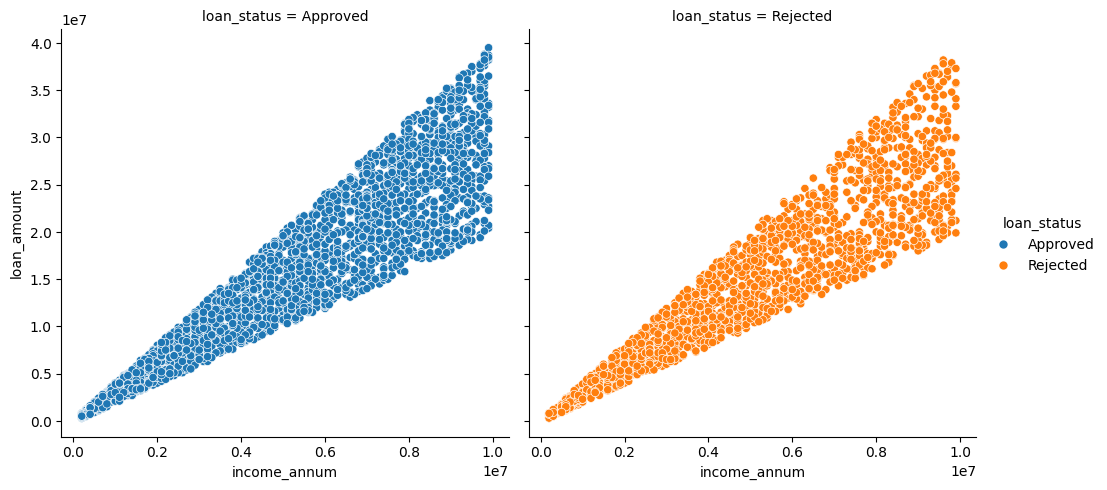

In [127]:
sns.relplot(x='income_annum',y='loan_amount',hue='loan_status',data=df,col='loan_status')
plt.show()

In [128]:
# sns.pairplot(df)

In [129]:
# from sklearn.preprocessing import OneHotEncoder

In [130]:
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# columns_to_encode = ['education', 'self_employed', 'loan_status']

In [131]:
# encoded_array = encoder.fit_transform(df[columns_to_encode])

# encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode))

# df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

In [132]:
# df_encoded

In [133]:
# columns_to_encode = ['education', 'self_employed', 'loan_status']


# df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
# df_encoded.head()

In [134]:
# df2 = pd.get_dummies(df,drop_first="if  binary").astype(int)
# df2

In [135]:
# columns_to_encode = ['education', 'self_employed', 'loan_status']


# df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True).astype(int)
# df_encoded.head()

In [136]:
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int)
df2.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [137]:
df2.dtypes

loan_id                     int32
no_of_dependents            int32
income_annum                int32
loan_amount                 int32
loan_term                   int32
cibil_score                 int32
residential_assets_value    int32
commercial_assets_value     int32
luxury_assets_value         int32
bank_asset_value            int32
education_Not Graduate      int32
self_employed_Yes           int32
loan_status_Rejected        int32
dtype: object

In [138]:
df2.drop('loan_id',axis='columns',inplace=True)
df2

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [139]:
x = df2.drop('loan_status_Rejected',axis=1)
y = df2[['loan_status_Rejected']]

In [140]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [141]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_transformed = scaler.fit_transform(x)

In [142]:
# Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.15)

In [143]:
# Model Training

from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()

rdf.fit(x_train,y_train)

print(rdf.score(x_train,y_train)*100)
print(rdf.score(x_test,y_test)*100)

100.0
98.28393135725429


In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [145]:
Ann_model = Sequential()

Ann_model.add(Dense(units=64,activation='relu',input_dim=11)) # 1 hidden layer with input layer

Ann_model.add(Dense(units=32,activation='relu')) # 2 hidden Layer
Ann_model.add(Dense(units=16,activation='relu')) # 3 hidden layer

Ann_model.add(Dense(units=1,activation='sigmoid')) # 4 output layer

Ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Ann_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
history = Ann_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7064 - loss: 0.5567 - val_accuracy: 0.9080 - val_loss: 0.2671
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.2262 - val_accuracy: 0.9126 - val_loss: 0.2303
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9361 - loss: 0.1973 - val_accuracy: 0.9126 - val_loss: 0.2085
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.1511 - val_accuracy: 0.9158 - val_loss: 0.1840
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9456 - loss: 0.1609 - val_accuracy: 0.9220 - val_loss: 0.1748
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9569 - loss: 0.1238 - val_accuracy: 0.9282 - val_loss: 0.1626
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.1260 - val_accuracy: 0.9329 - val_loss: 0.1524
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9537 - loss: 0.1259 - val_accuracy: 0.

In [147]:
history_df = pd.DataFrame(history.history,index=range(1,11))
history_df

,accuracy,loss,val_accuracy,val_loss
1,0.815050,0.432360,0.907956,0.267074
2,0.928886,0.209349,0.912637,0.230282
3,0.942393,0.180441,0.912637,0.208531
4,0.945149,0.162616,0.915757,0.184030
5,0.945424,0.147458,0.921997,0.174771
6,0.947630,0.137685,0.928237,0.162586
7,0.955623,0.126678,0.932917,0.152383
8,0.959757,0.116017,0.932917,0.155040
9,0.960309,0.107607,0.940718,0.138204
10,0.967751,0.099225,0.937598,0.131085


<Axes: >

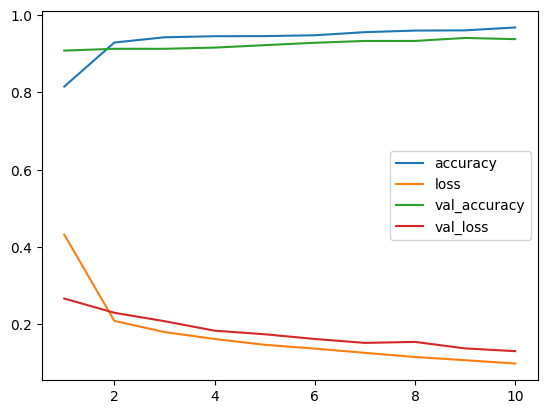

In [148]:
history_df.plot()

In [149]:
x_test

array([[ 0.8853442 ,  1.22603332,  1.52246042, ...,  1.36109954,
         1.00446064,  0.99276452],
       [-0.2941017 ,  0.19272188,  0.17324673, ...,  0.06871415,
         1.00446064,  0.99276452],
       [-0.88382465, -1.19690386, -0.94372526, ..., -1.131358  ,
         1.00446064, -1.00728821],
       ...,
       [ 1.47506715,  0.40651045,  0.14006934, ...,  0.40719604,
         1.00446064, -1.00728821],
       [-0.88382465, -1.51758672, -1.39714954, ..., -1.25444232,
        -0.99555917,  0.99276452],
       [-0.88382465,  0.33524759, -0.16958626, ...,  0.65336469,
         1.00446064, -1.00728821]])

In [150]:
# Prediction
prediction = Ann_model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [151]:
prediction

array([[9.99035537e-01],
       [1.41156235e-07],
       [5.56666113e-04],
       [9.75736916e-01],
       [9.96234357e-01],
       [9.99997973e-01],
       [9.99384761e-01],
       [3.38590831e-01],
       [9.50140357e-01],
       [8.66609097e-01],
       [6.78316064e-05],
       [1.02179719e-03],
       [9.99850690e-01],
       [9.48216856e-01],
       [6.29597306e-02],
       [6.26386143e-04],
       [1.60920923e-03],
       [9.99634266e-01],
       [7.36121833e-03],
       [2.74705177e-04],
       [8.57267059e-06],
       [1.35585964e-01],
       [9.99328196e-01],
       [1.32217258e-01],
       [3.61916833e-02],
       [7.48956740e-01],
       [1.01739568e-08],
       [9.99895096e-01],
       [9.84774172e-01],
       [4.43597496e-01],
       [9.44725692e-01],
       [1.69232473e-01],
       [9.99996841e-01],
       [9.99177396e-01],
       [3.38742808e-02],
       [9.14441235e-03],
       [1.87887880e-03],
       [5.96179405e-07],
       [6.63680077e-01],
       [9.99707520e-01],


In [152]:
pred = (prediction > 0.5).astype(int).ravel()
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [153]:
y_test['prediction'] = pred
y_test.head(40)

,loan_status_Rejected,prediction
198,1,1
3878,0,0
2912,0,0
93,1,1
3483,1,1
2832,1,1
1447,1,1
4043,1,0
1310,1,1
1982,1,1


In [154]:
from sklearn.metrics import confusion_matrix,classification_report

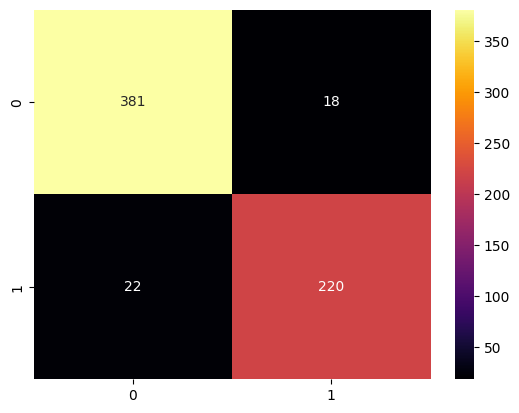

In [155]:
matrix = confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])

sns.heatmap(matrix,annot=True,fmt='d',cmap='inferno')
plt.show()

In [156]:
Ann_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

In [157]:

input_data = np.array([[2,9600000,20,12,70008,2000,17600,22700,80000,0,0]])

input_transformed = scaler.transform(input_data)

prediction = Ann_model.predict(input_transformed)

print(prediction)

pred = (prediction > 0.5).astype(int)

value = int(pred[0][0])

print(value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.]]
0


In [158]:
input_transformed

array([[-2.94101701e-01,  1.61797904e+00, -1.67362554e+00,
         1.92616511e-01,  4.02575151e+02, -1.14881752e+00,
        -1.12922627e+00, -1.65924692e+00, -1.50676518e+00,
        -9.95559169e-01, -1.00728821e+00]])

In [159]:
import joblib,os

In [160]:
joblib.dump(scaler,'models/scaler.lb')

['models/scaler.lb']

In [161]:
os.makedirs('models',exist_ok=True)

In [162]:
Ann_model.save('models/ann_model.h5') # .h5 -> tensorflow , .pt -> pytorch

In [163]:
x_train

array([[ 0.29562125, -0.23485527,  0.01841893, ..., -0.4851653 ,
        -0.99555917,  0.99276452],
       [-0.2941017 , -1.16127243, -1.27549912, ..., -1.06981584,
         1.00446064,  0.99276452],
       [-0.88382465, -1.44632386, -1.34185389, ..., -1.2852134 ,
        -0.99555917,  0.99276452],
       ...,
       [-1.4735476 , -0.37738099, -0.40182796, ...,  0.28411172,
        -0.99555917, -1.00728821],
       [-1.4735476 ,  0.97661332,  0.42760669, ...,  1.4226417 ,
         1.00446064,  0.99276452],
       [ 1.47506715, -1.624481  , -1.51879995, ..., -1.4390688 ,
        -0.99555917,  0.99276452]])